In [1]:
import pandas as pd
import numpy as np

In [2]:
job_df = pd.read_csv('datasets/fake_job_postings.csv').drop(['job_id'],axis=1)
job_df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17879 non-null  object
 6   requirements         15185 non-null  object
 7   benefits             10670 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

## Data Preparation / Cleaning

In [4]:
job_df.isna().sum()

title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

### To avoid overcomplicating this project, I will:
- Replace the title with the most used word in the data. Ex:'Community and Social Manager' -> 'Manager'; 
- Only consider if the job posting had data or not, for the columns: company_profile, requirements, and benefits;
- Separate in two columns with the max and min range of the column salary_range;
- Ignore the column description;
- Fill all missing values with string 'other'.

In [5]:
job_df.drop(['description'], axis=1, inplace=True)

In [6]:
job_df.company_profile = (job_df.company_profile.isna()).astype(int)
job_df.requirements = (job_df.requirements.isna()).astype(int)
job_df.benefits = (job_df.benefits.isna()).astype(int)

In [7]:
job_df['salary_range'].replace('(.*[a-zA-Z]+.*)',np.NaN,regex=True, inplace=True)

In [8]:
job_df[['salary_range_min', 'salary_range_max']] = job_df['salary_range'].str.split('-', 1, expand=True)
job_df.drop(['salary_range'], axis=1, inplace=True)

/tmp/ipykernel_47484/3086578065.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  job_df[['salary_range_min', 'salary_range_max']] = job_df['salary_range'].str.split('-', 1, expand=True)


In [9]:
job_df[['salary_range_min', 'salary_range_max']].isna().sum()

salary_range_min    15038
salary_range_max    15039
dtype: int64

In [10]:
job_df[['salary_range_min', 'salary_range_max']] = job_df[['salary_range_min', 'salary_range_max']].fillna(0)
job_df[['salary_range_min', 'salary_range_max']].isna().sum()

salary_range_min    0
salary_range_max    0
dtype: int64

In [11]:
job_df = job_df.replace(np.NaN,'other')
job_df.isna().sum()

title                  0
location               0
department             0
company_profile        0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
salary_range_min       0
salary_range_max       0
dtype: int64

In [12]:
categorical = ['title','location','department', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']
numerical = ['salary_range_min', 'salary_range_max']
binary = ['company_profile', 'requirements', 'benefits', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']

In [13]:
import unidecode

In [14]:
for column in categorical:
    job_df[column] = job_df[column].apply(lambda x: unidecode.unidecode(x).lower())

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

In [16]:
def get_repeated_words(df, column, percent):
    
    df_vector = vectorizer.fit_transform(df[column])
    bag_df = pd.DataFrame(df_vector.toarray(),columns=vectorizer.get_feature_names())
    
    col = []
    appear = []
    for column in bag_df.columns:
        col.append(column)
        appear.append(bag_df[column].sum())
    
    temp_df = pd.DataFrame({'col_name':col,'qtd':appear})
    
    df_order = temp_df.sort_values(by='qtd', ascending=False)
    
    return df_order[0:round((1-percent)*len(df_order))]

In [17]:
# Get only the 5% words most used in title
title_df = get_repeated_words(job_df,'title',0.95)

/home/ubuntu/Desktop/Projects/Bookcamp/Valid_Job_Prediction/.pyenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
def replace_word(string, df):
    index = 100000
    for s in string.split(' '):
        ind = df[df.col_name == s].index.to_list()
        if not len(ind):
            continue
        elif index > ind[0]:
            index = ind[0]
    if index == 100000:
        return 'other'
    return df.loc[index].col_name

In [19]:
job_df.title = job_df.title.apply(lambda x: replace_word(x, title_df))

In [20]:
#job_df.to_csv('job_prep.csv',index=False)

In [21]:
from sklearn.model_selection import train_test_split

In [111]:
df_train_full, df_test = train_test_split(job_df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

y_train = df_train.fraudulent
y_val = df_val.fraudulent
y_test = df_test.fraudulent

del df_train['fraudulent']
del df_val['fraudulent']
del df_test['fraudulent']

# EDA

In [23]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 20,10

/tmp/ipykernel_47484/3455214805.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pd.concat([df_train,y_train],axis=1).corr(),annot=True)


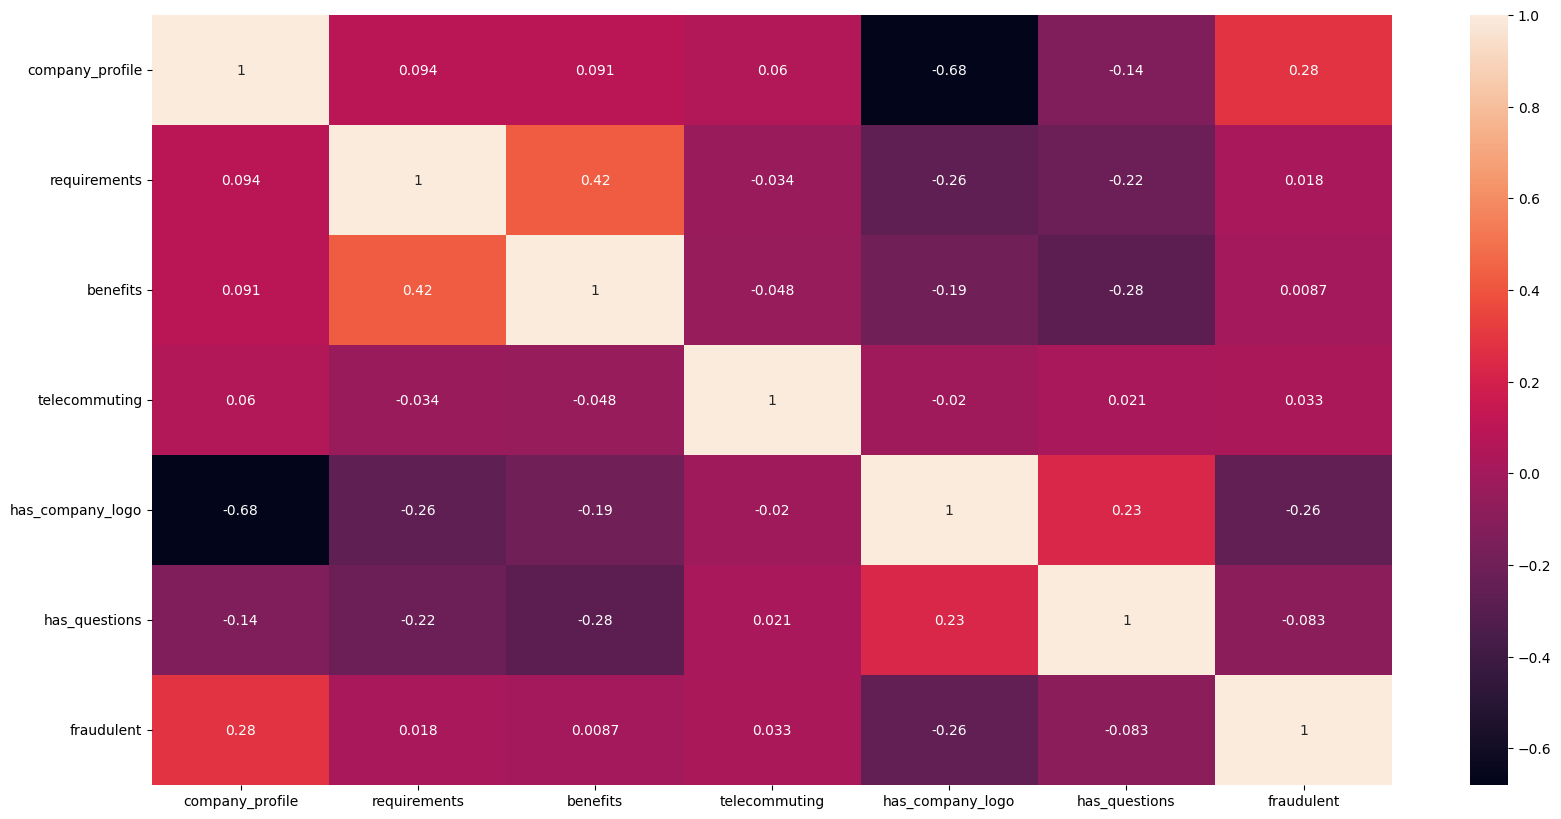

In [24]:
sns.heatmap(pd.concat([df_train,y_train],axis=1).corr(),annot=True)
plt.show()

In [25]:
def percent_fraudulent(df, column, percent):
    mean_dict = {}
    for col in df[column].unique():
        mean_dict[col] = round(df[df[column] == col].fraudulent.mean(),3)
    
    mean_df = pd.DataFrame(mean_dict.items(),columns=[column,'mean'])
    
    # all titles which percentage% or more was fraudulent
    ax = sns.barplot(data=mean_df[mean_df['mean'] > percent], x=column, y="mean")
    for i in ax.containers:
        ax.bar_label(i,)

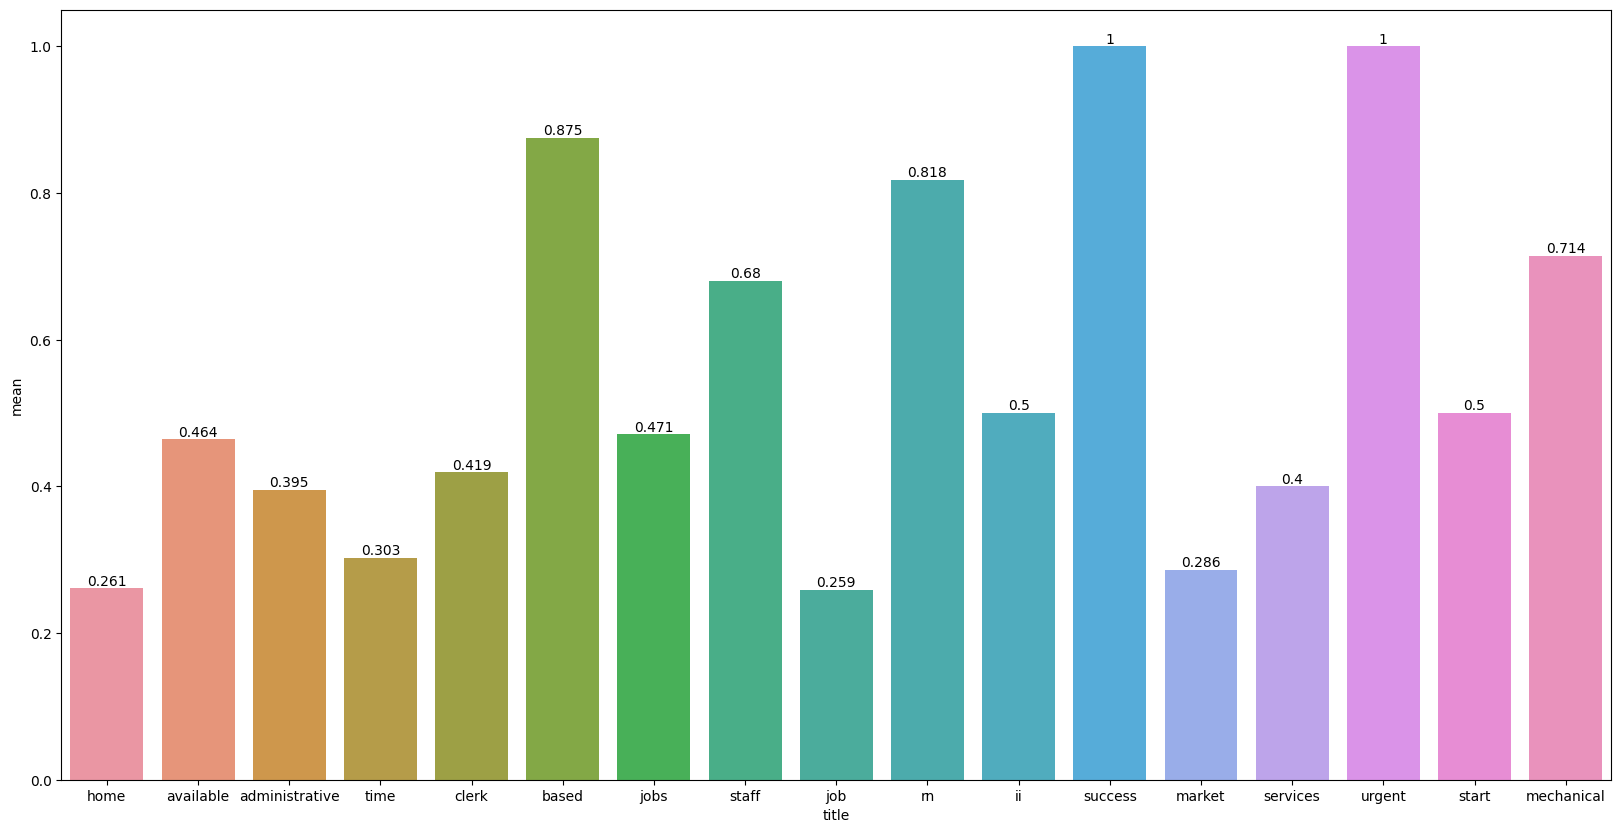

In [26]:
percent_fraudulent(df_train_full,'title',0.25)

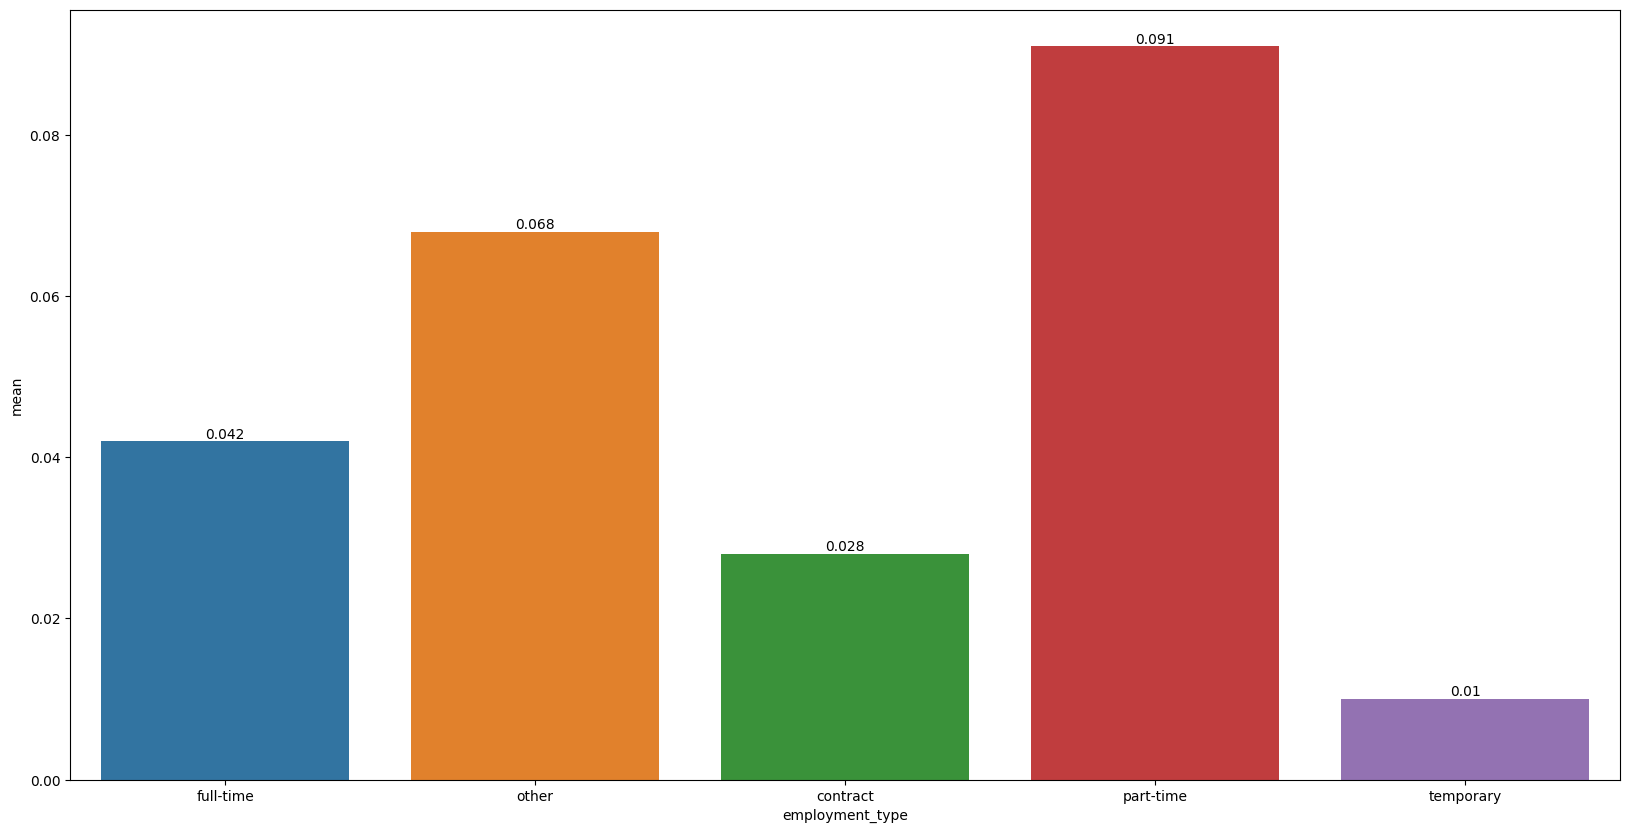

In [27]:
percent_fraudulent(df_train_full,'employment_type',0)

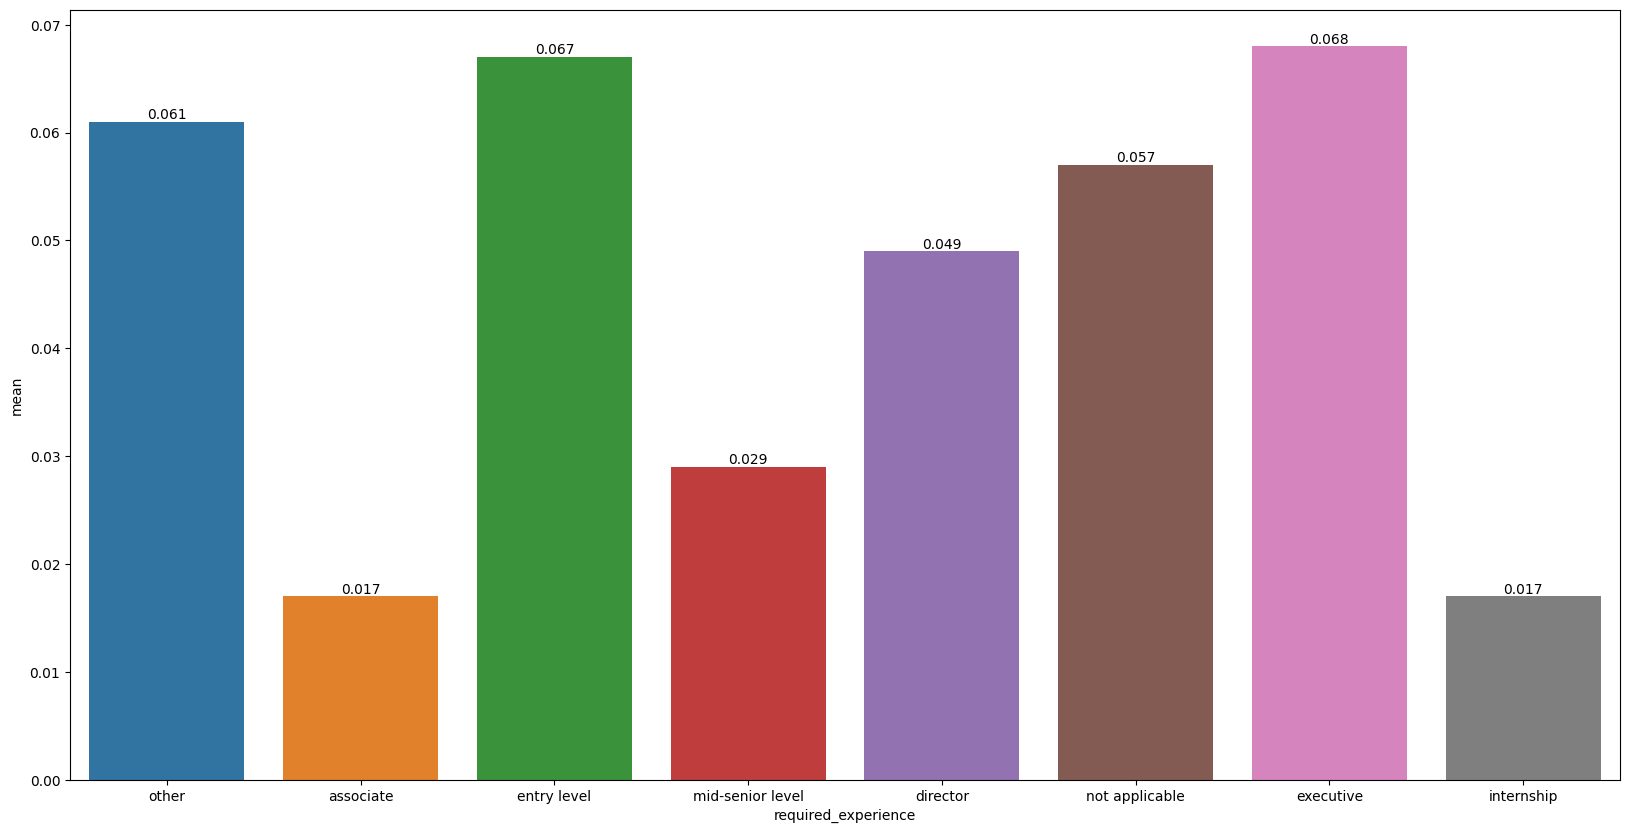

In [28]:
percent_fraudulent(df_train_full,'required_experience',0)

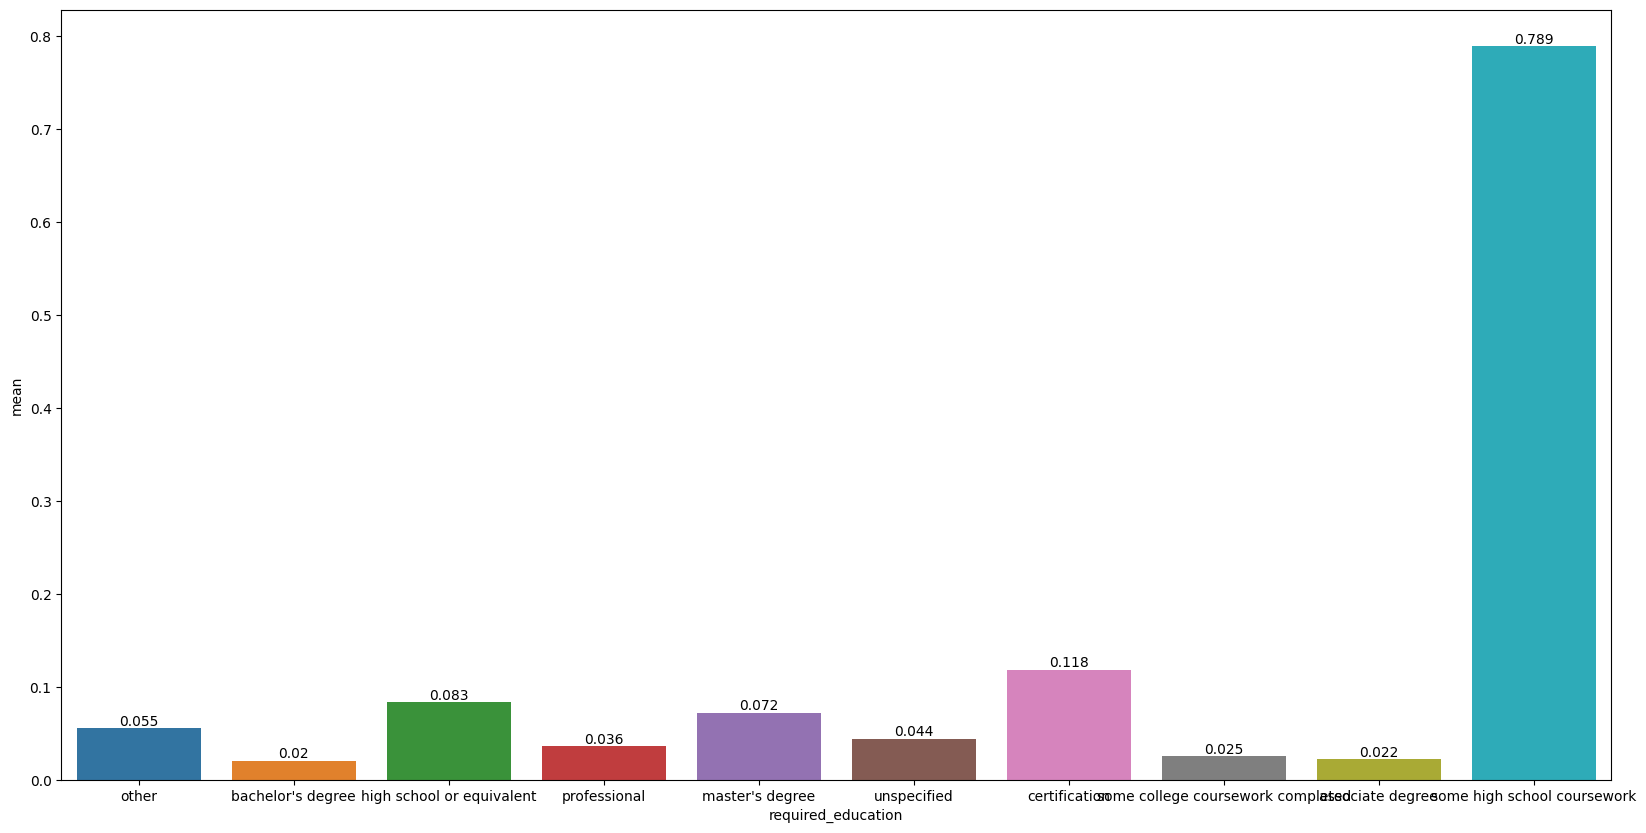

In [29]:
percent_fraudulent(df_train_full,'required_education',0)

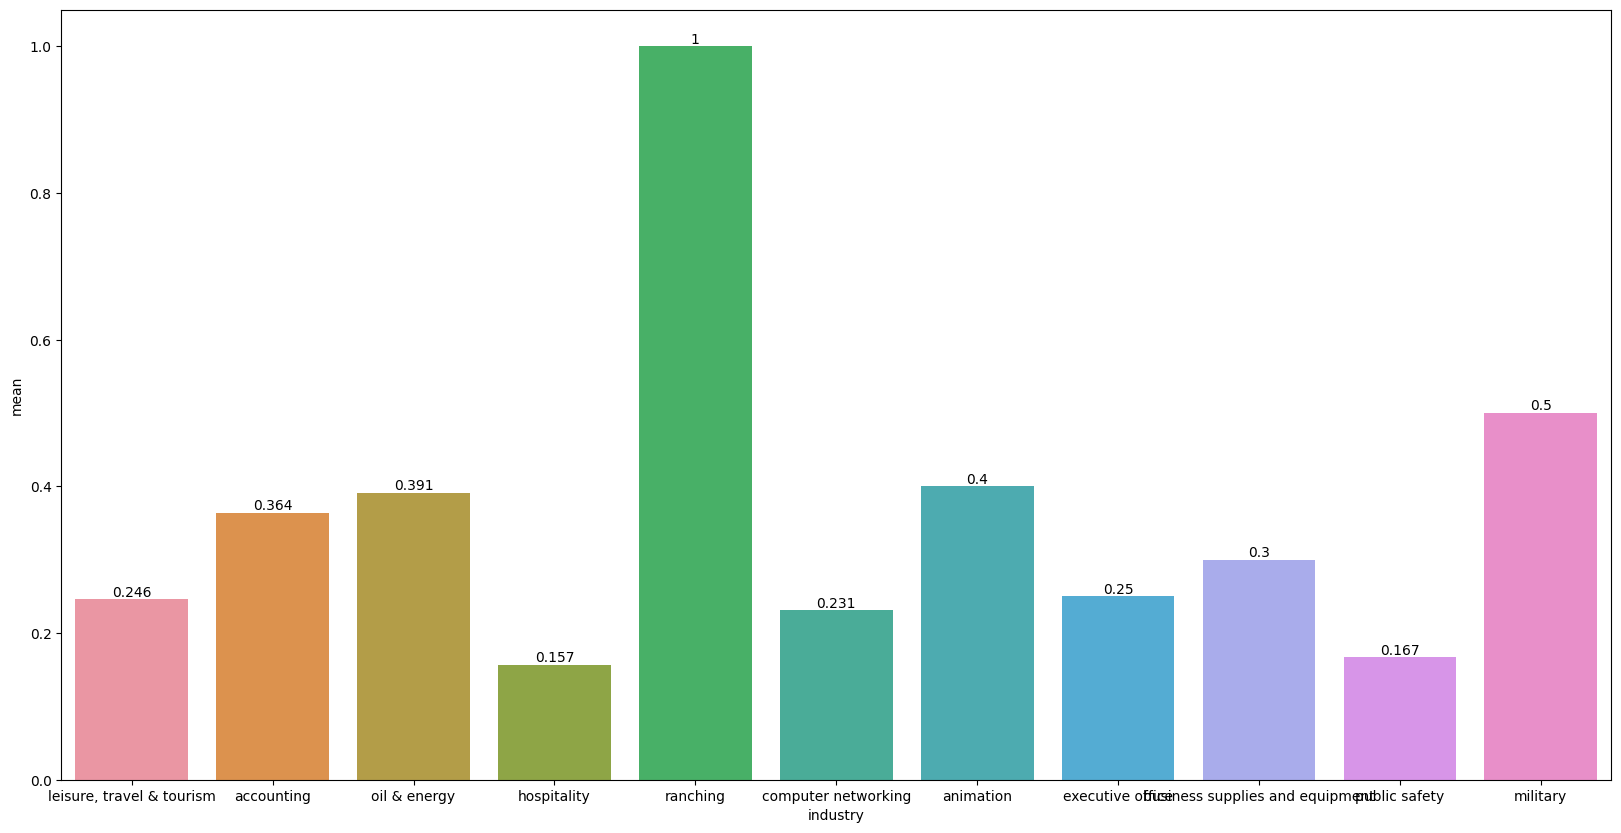

In [30]:
percent_fraudulent(df_train_full,'industry',0.15)

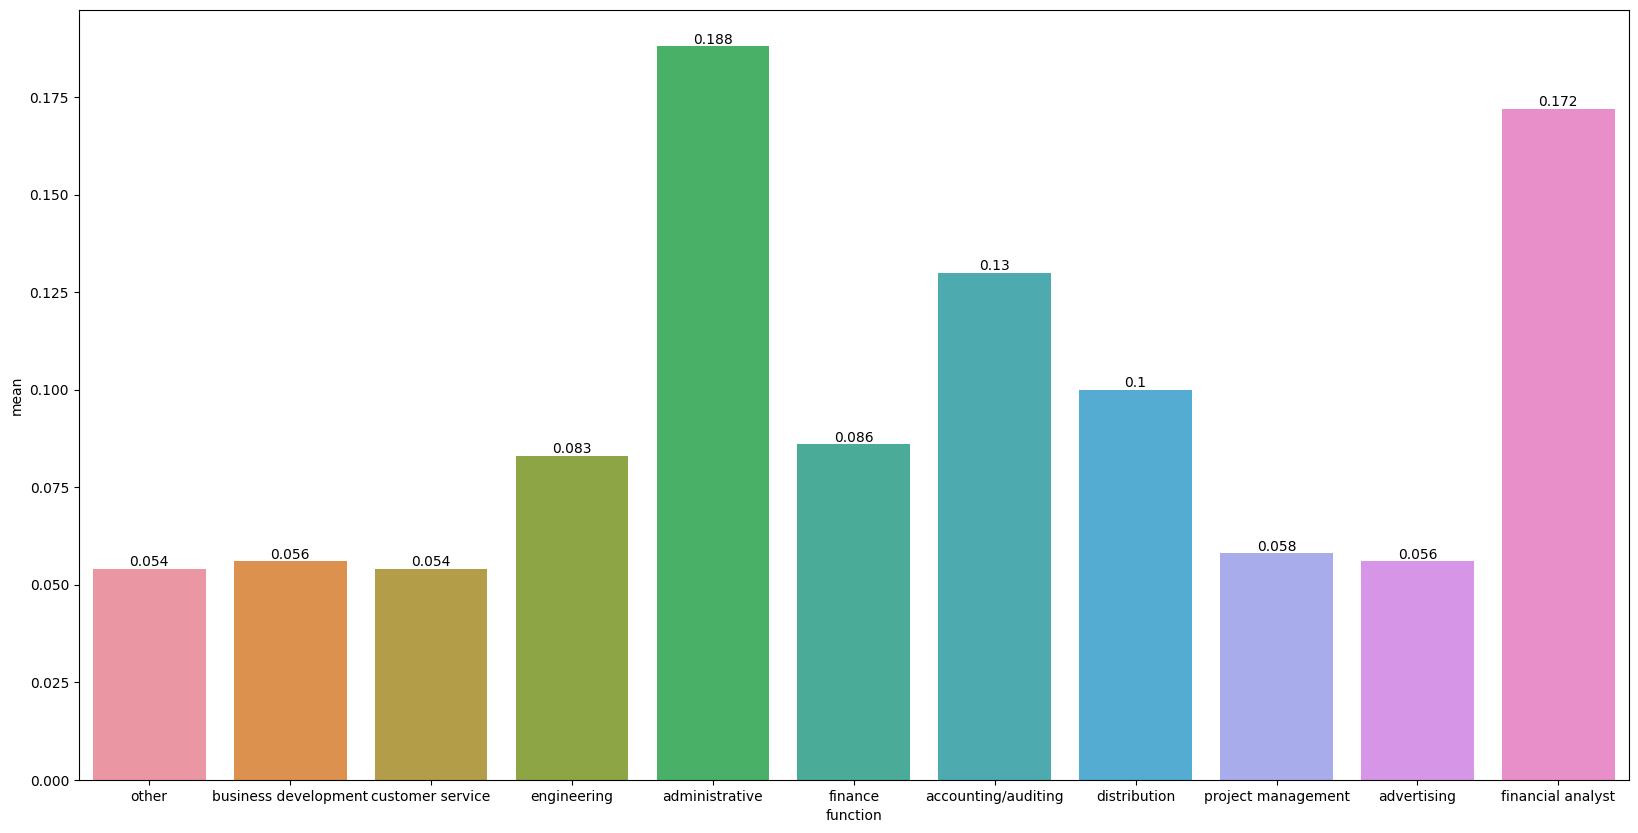

In [31]:
percent_fraudulent(df_train_full,'function',0.05)

In [32]:
global_fake = round(df_train_full.fraudulent.mean(),3)
global_fake

0.048

In [33]:
binary_df = pd.DataFrame()

for col in binary[0:-1]:

    zero_col = round(df_train_full.fraudulent[df_train_full[col] == 0].mean(),3)
    binary_dict = {'col_name': col, 'value': 0, 'global': global_fake,'mean': zero_col, 'diff':zero_col-global_fake, 'risk': zero_col/global_fake}
    binary_df = binary_df.append(binary_dict, ignore_index=True)
    
    one_col = round(df_train_full.fraudulent[df_train_full[col] == 1].mean(),3)
    binary_dict = {'col_name': col, 'value': 1, 'global': global_fake, 'mean': one_col, 'diff':one_col-global_fake, 'risk': one_col/global_fake}
    binary_df = binary_df.append(binary_dict, ignore_index=True)

binary_df

/tmp/ipykernel_47484/1791071533.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  binary_df = binary_df.append(binary_dict, ignore_index=True)
/tmp/ipykernel_47484/1791071533.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  binary_df = binary_df.append(binary_dict, ignore_index=True)
/tmp/ipykernel_47484/1791071533.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  binary_df = binary_df.append(binary_dict, ignore_index=True)
/tmp/ipykernel_47484/1791071533.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  binary_df = binary_df.append(binary_dict, ignore_index=True)
/tmp/ipykernel_47484/1791071533.py:7: FutureWarning: The frame

,col_name,value,global,mean,diff,risk
0,company_profile,0,0.048,0.019,-0.029,0.395833
1,company_profile,1,0.048,0.175,0.127,3.645833
2,requirements,0,0.048,0.046,-0.002,0.958333
3,requirements,1,0.048,0.059,0.011,1.229167
4,benefits,0,0.048,0.045,-0.003,0.937500
5,benefits,1,0.048,0.052,0.004,1.083333
6,telecommuting,0,0.048,0.046,-0.002,0.958333
7,telecommuting,1,0.048,0.083,0.035,1.729167
8,has_company_logo,0,0.048,0.159,0.111,3.312500
9,has_company_logo,1,0.048,0.020,-0.028,0.416667


In [34]:
df_train_full.salary_range_min = df_train_full.salary_range_min.astype(int)
df_train_full.salary_range_max = df_train_full.salary_range_max.astype(int)

In [35]:
df_train_full[numerical].corrwith(df_train_full.fraudulent).to_frame('correlation')

,correlation
salary_range_min,-0.002285
salary_range_max,-0.002064


## Models

Train and validade the following classifiers:
- Logistic Regression
- SVM
- Naive Bayes
- Decision Tree
- Random Forest

Further investigation and tuning parameters

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
# one hot-encoding
from sklearn.feature_extraction import DictVectorizer

In [38]:
def train_one_hot_encondig(df_train, columns):
    train_dict = df_train[columns].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    X_train = dv.transform(train_dict)
    return X_train, dv

In [39]:
def get_one_hot_encondig(df_val, columns, dv):
    val_dict = df_val[columns].to_dict(orient='records')
    return dv.transform(val_dict)

In [40]:
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import KFold

### LogisticRegression

In [41]:
from sklearn.linear_model import LogisticRegression

In [63]:
def train_logistics(X_train, y_train, X_val):
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train, y_train)
    
    return model.predict(X_val)

In [74]:
def validate_logistic(n_splits, df_train_full):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.fraudulent
        y_val = df_val.fraudulent

        X_train, dv = train_one_hot_encondig(df_train,numerical+categorical+binary[0:-1])
        X_val = get_one_hot_encondig(df_val, numerical+categorical+binary[0:-1], dv)
        y_pred = train_logistics(X_train, y_train, X_val)

        print('roc_score: ',round(roc_auc_score(y_val, y_pred),3))
        print('confusion_matrix: \n',confusion_matrix(y_val, y_pred))
        print('---------------------------------------------------')

In [75]:
validate_logistic(3, df_train_full)

roc_score:  0.5
confusion_matrix: 
 [[4540    0]
 [ 228    0]]
---------------------------------------------------
roc_score:  0.5
confusion_matrix: 
 [[4542    0]
 [ 226    0]]
---------------------------------------------------
roc_score:  0.5
confusion_matrix: 
 [[4537    0]
 [ 231    0]]
---------------------------------------------------


### SVM

In [47]:
from sklearn import svm

In [62]:
def train_svm(X_train, y_train, X_val):
    model = svm.SVR()
    model.fit(X_train, y_train)
    
    return model.predict(X_val)

In [70]:
def validate_svm(n_splits, df_train_full):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.fraudulent
        y_val = df_val.fraudulent

        X_train, dv = train_one_hot_encondig(df_train,numerical+categorical+binary[0:-1])
        X_val = get_one_hot_encondig(df_val, numerical+categorical+binary[0:-1], dv)
        y_pred = train_svm(X_train, y_train, X_val)

        print('roc_score: ',round(roc_auc_score(y_val, y_pred),3))
        y_pred = pd.DataFrame(y_pred>0.5).astype(int)
        print('confusion_matrix: \n',confusion_matrix(y_val, y_pred))
        print('---------------------------------------------------')

In [71]:
validate_svm(3, df_train_full)

roc_score:  0.644
confusion_matrix: 
 [[4540    0]
 [ 228    0]]
---------------------------------------------------
roc_score:  0.66
confusion_matrix: 
 [[4542    0]
 [ 226    0]]
---------------------------------------------------
roc_score:  0.658
confusion_matrix: 
 [[4537    0]
 [ 231    0]]
---------------------------------------------------


### Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB

In [56]:
def train_naive(X_train, y_train, X_val):
    model = GaussianNB()
    model.fit(X_train, y_train)
    
    return model.predict(X_val)

In [72]:
def validate_naive(n_splits, df_train_full):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.fraudulent
        y_val = df_val.fraudulent

        X_train, dv = train_one_hot_encondig(df_train,numerical+categorical+binary[0:-1])
        X_val = get_one_hot_encondig(df_val, numerical+categorical+binary[0:-1], dv)
        y_pred = train_naive(X_train, y_train, X_val)

        print('roc_score: ',round(roc_auc_score(y_val, y_pred),3))
        y_pred = pd.DataFrame(y_pred>0.5).astype(int)
        print('confusion_matrix: \n',confusion_matrix(y_val, y_pred))
        print('---------------------------------------------------')

In [73]:
validate_naive(3, df_train_full)

roc_score:  0.497
confusion_matrix: 
 [[  31 4509]
 [   3  225]]
---------------------------------------------------
roc_score:  0.488
confusion_matrix: 
 [[  13 4529]
 [   6  220]]
---------------------------------------------------
roc_score:  0.496
confusion_matrix: 
 [[   3 4534]
 [   2  229]]
---------------------------------------------------


### Decision Tree

In [66]:
from sklearn import tree

In [67]:
def train_tree(X_train, y_train, X_val):
    model = tree.DecisionTreeClassifier()
    model.fit(X_train, y_train)
    
    return model.predict(X_val)

In [68]:
def validate_tree(n_splits, df_train_full):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.fraudulent
        y_val = df_val.fraudulent

        X_train, dv = train_one_hot_encondig(df_train,numerical+categorical+binary[0:-1])
        X_val = get_one_hot_encondig(df_val, numerical+categorical+binary[0:-1], dv)
        y_pred = train_tree(X_train, y_train, X_val)

        print('roc_score: ',round(roc_auc_score(y_val, y_pred),3))
        y_pred = pd.DataFrame(y_pred>0.5).astype(int)
        print('confusion_matrix: \n',confusion_matrix(y_val, y_pred))
        print('---------------------------------------------------')

In [76]:
validate_tree(3, df_train_full)

roc_score:  0.823
confusion_matrix: 
 [[4488   52]
 [  78  150]]
---------------------------------------------------
roc_score:  0.865
confusion_matrix: 
 [[4499   43]
 [  59  167]]
---------------------------------------------------
roc_score:  0.8
confusion_matrix: 
 [[4468   69]
 [  89  142]]
---------------------------------------------------


### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
def train_forest(X_train, y_train, X_val):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    return model.predict(X_val)

In [82]:
def validate_forest(n_splits, df_train_full):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.fraudulent
        y_val = df_val.fraudulent

        X_train, dv = train_one_hot_encondig(df_train,numerical+categorical+binary[0:-1])
        X_val = get_one_hot_encondig(df_val, numerical+categorical+binary[0:-1], dv)
        y_pred = train_forest(X_train, y_train, X_val)

        print('roc_score: ',round(roc_auc_score(y_val, y_pred),3))
        y_pred = pd.DataFrame(y_pred>0.5).astype(int)
        print('confusion_matrix: \n',confusion_matrix(y_val, y_pred))
        print('---------------------------------------------------')

In [85]:
validate_forest(3, df_train_full)

roc_score:  0.774
confusion_matrix: 
 [[4538    2]
 [ 103  125]]
---------------------------------------------------
roc_score:  0.805
confusion_matrix: 
 [[4541    1]
 [  88  138]]
---------------------------------------------------
roc_score:  0.779
confusion_matrix: 
 [[4537    0]
 [ 102  129]]
---------------------------------------------------


### Decision Tree Chosen

Testing parameters:
- splitter
- max_depth
- min_samples_split
- min_samples_leaf
- max_feature


link: https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

In [101]:
from sklearn.metrics import roc_curve, auc

In [153]:
max_depths = np.linspace(1, 100, 5, endpoint=True)
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
max_features = list(range(1,df_train.shape[1]))
#default
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
max_feature = None

In [97]:
def train_pr_tree(X_train, y_train, max_depth, min_samples_split, min_samples_leaf, max_feature):
    model = tree.DecisionTreeClassifier(max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_feature)
    model.fit(X_train, y_train)
    
    return model

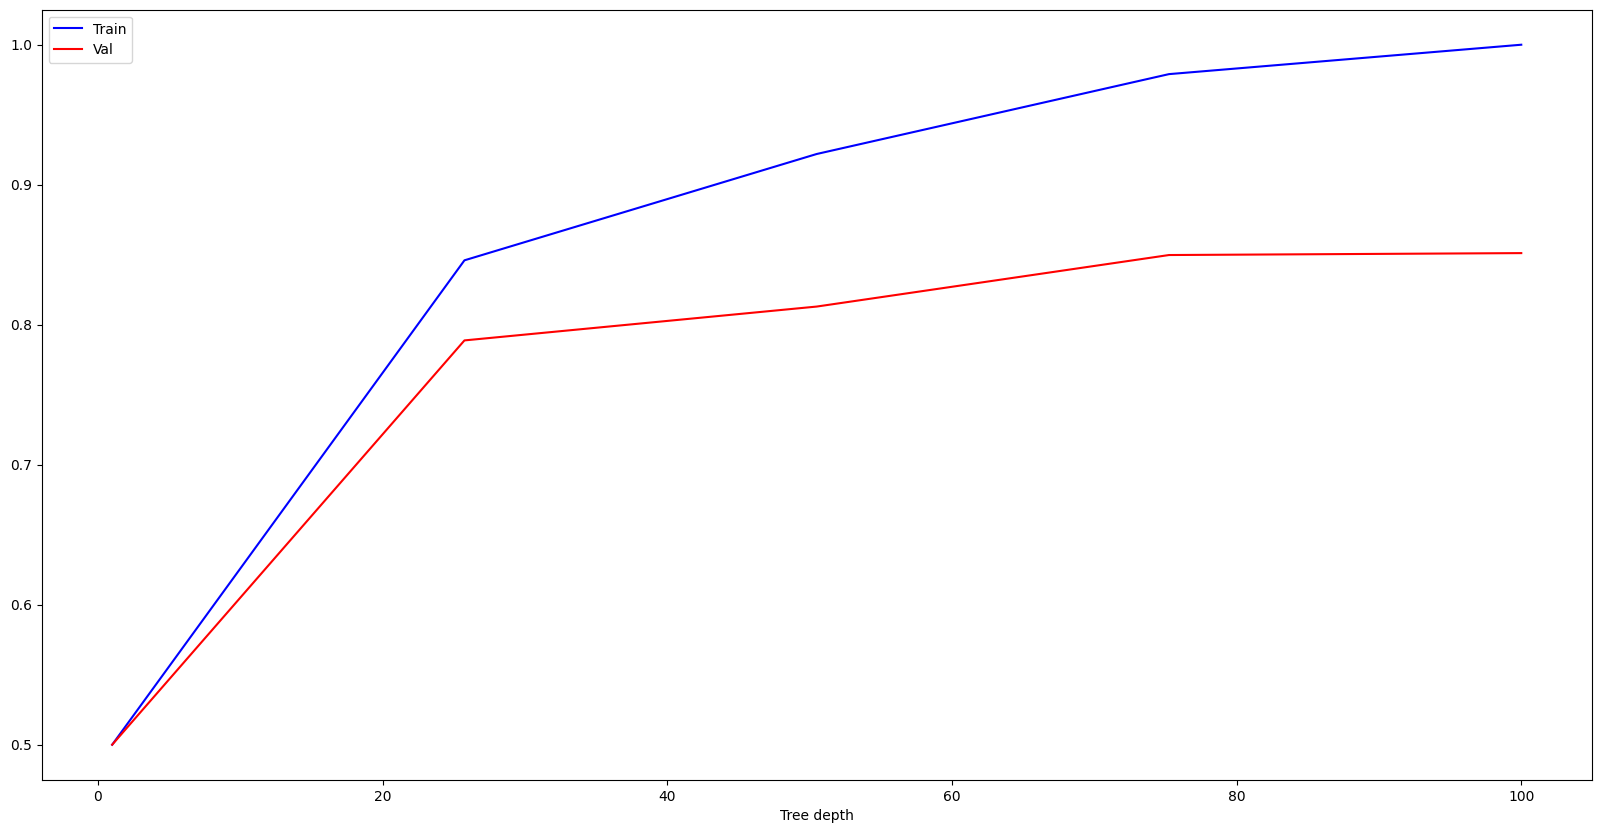

In [144]:
vals_results = []
train_results = []

X_train, dv = train_one_hot_encondig(df_train,numerical+categorical+binary[0:-1])
X_val = get_one_hot_encondig(df_val, numerical+categorical+binary[0:-1], dv)
    
for max_depth in max_depths:
    
        
    max_depth = int(max_depth)
    model = train_pr_tree(X_train, y_train, max_depth, min_samples_split, min_samples_leaf, max_feature)
    
    train_pred = model.predict(X_train)
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    train_results.append(roc_auc_train)
    
    val_pred = model.predict(X_val)
    fpr_val, tpr_val, thresholds_val = roc_curve(y_val, val_pred)
    roc_auc_val = auc(fpr_val, tpr_val)
    vals_results.append(roc_auc_val)

    
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, vals_results, 'r', label='Val AUC')
plt.xlabel('Tree depth')
plt.legend(['Train', 'Val'])
plt.show()

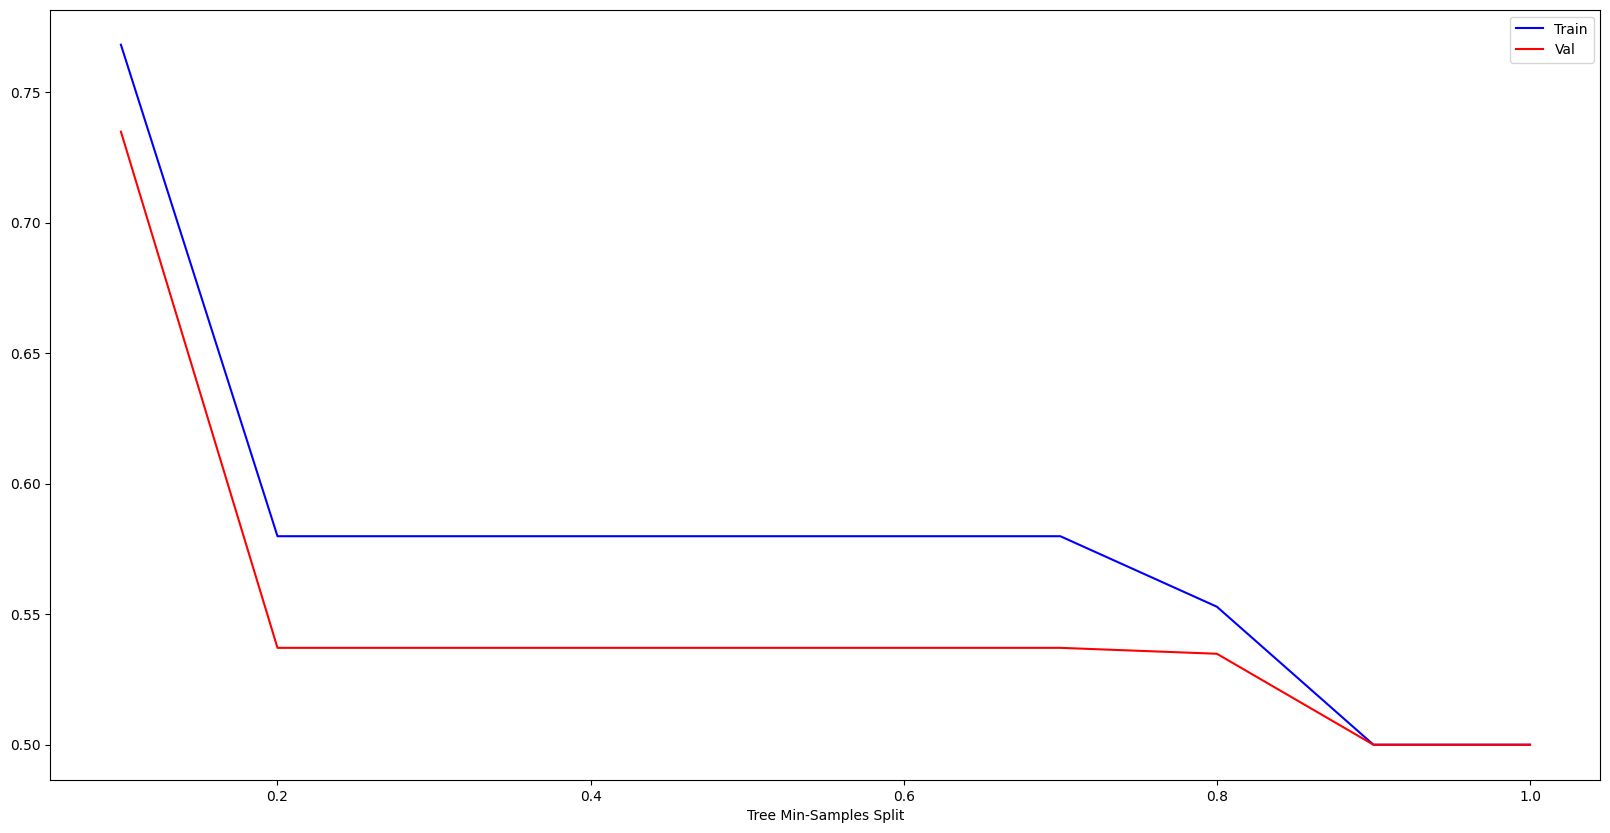

In [154]:
vals_results = []
train_results = []

X_train, dv = train_one_hot_encondig(df_train,numerical+categorical+binary[0:-1])
X_val = get_one_hot_encondig(df_val, numerical+categorical+binary[0:-1], dv)
    
for min_samples_split in min_samples_splits:
    
    model = train_pr_tree(X_train, y_train, max_depth, min_samples_split, min_samples_leaf, max_feature)
    
    train_pred = model.predict(X_train)
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    train_results.append(roc_auc_train)
    
    val_pred = model.predict(X_val)
    fpr_val, tpr_val, thresholds_val = roc_curve(y_val, val_pred)
    roc_auc_val = auc(fpr_val, tpr_val)
    vals_results.append(roc_auc_val)

    
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, vals_results, 'r', label='Val AUC')
plt.xlabel('Tree Min-Samples Split')
plt.legend(['Train', 'Val'])
plt.show()

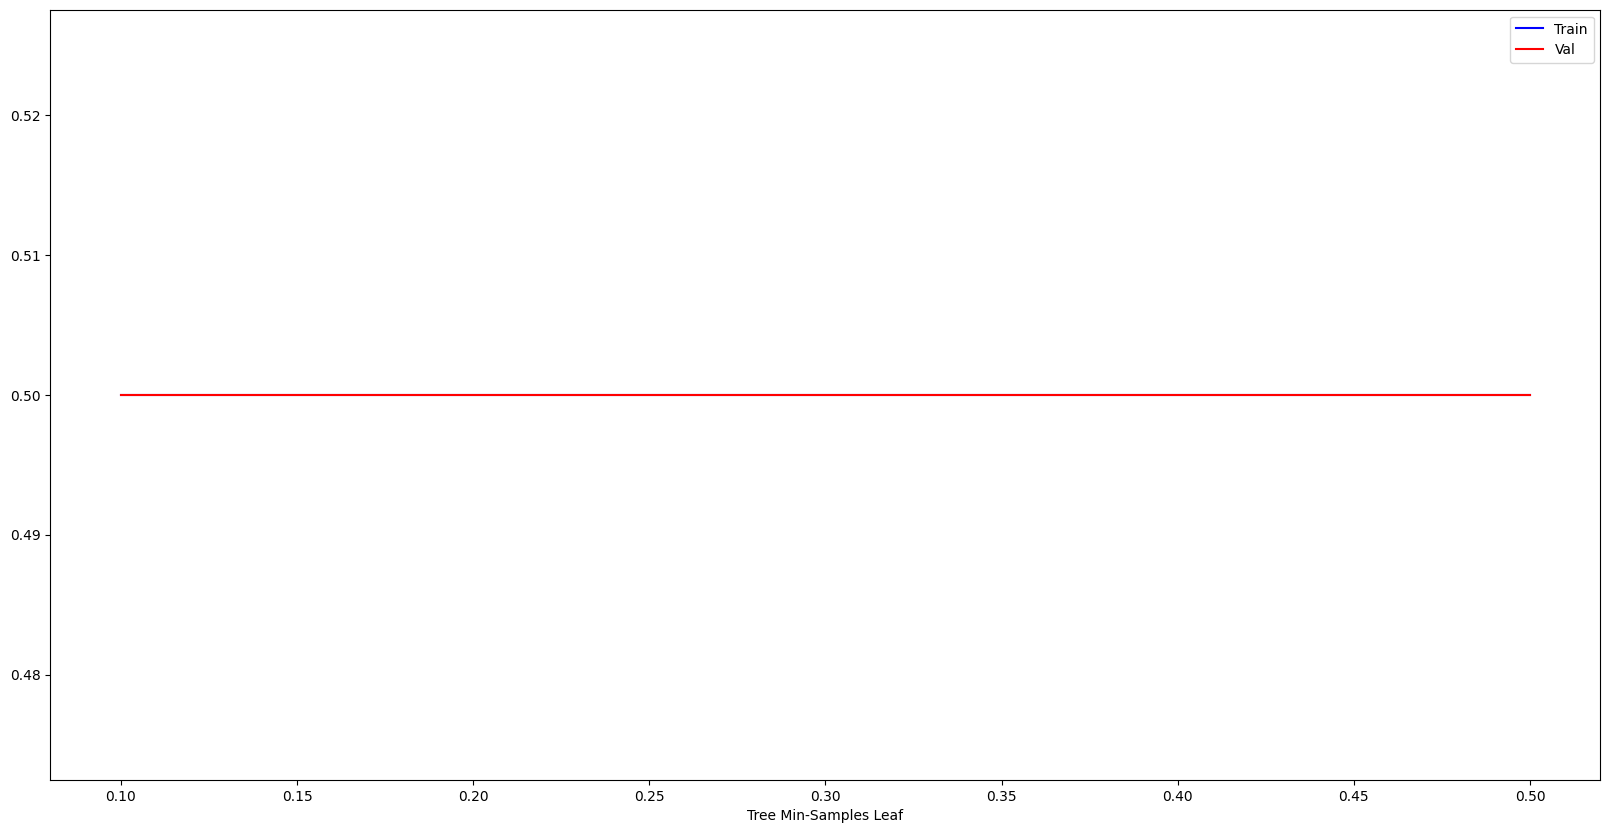

In [157]:
vals_results = []
train_results = []

X_train, dv = train_one_hot_encondig(df_train,numerical+categorical+binary[0:-1])
X_val = get_one_hot_encondig(df_val, numerical+categorical+binary[0:-1], dv)
    
for min_samples_leaf in min_samples_leafs:
    
    model = train_pr_tree(X_train, y_train, max_depth, min_samples_split, min_samples_leaf, max_feature)
    
    train_pred = model.predict(X_train)
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    train_results.append(roc_auc_train)
    
    val_pred = model.predict(X_val)
    fpr_val, tpr_val, thresholds_val = roc_curve(y_val, val_pred)
    roc_auc_val = auc(fpr_val, tpr_val)
    vals_results.append(roc_auc_val)

    
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, vals_results, 'r', label='Val AUC')
plt.xlabel('Tree Min-Samples Leaf')
plt.legend(['Train', 'Val'])
plt.show()

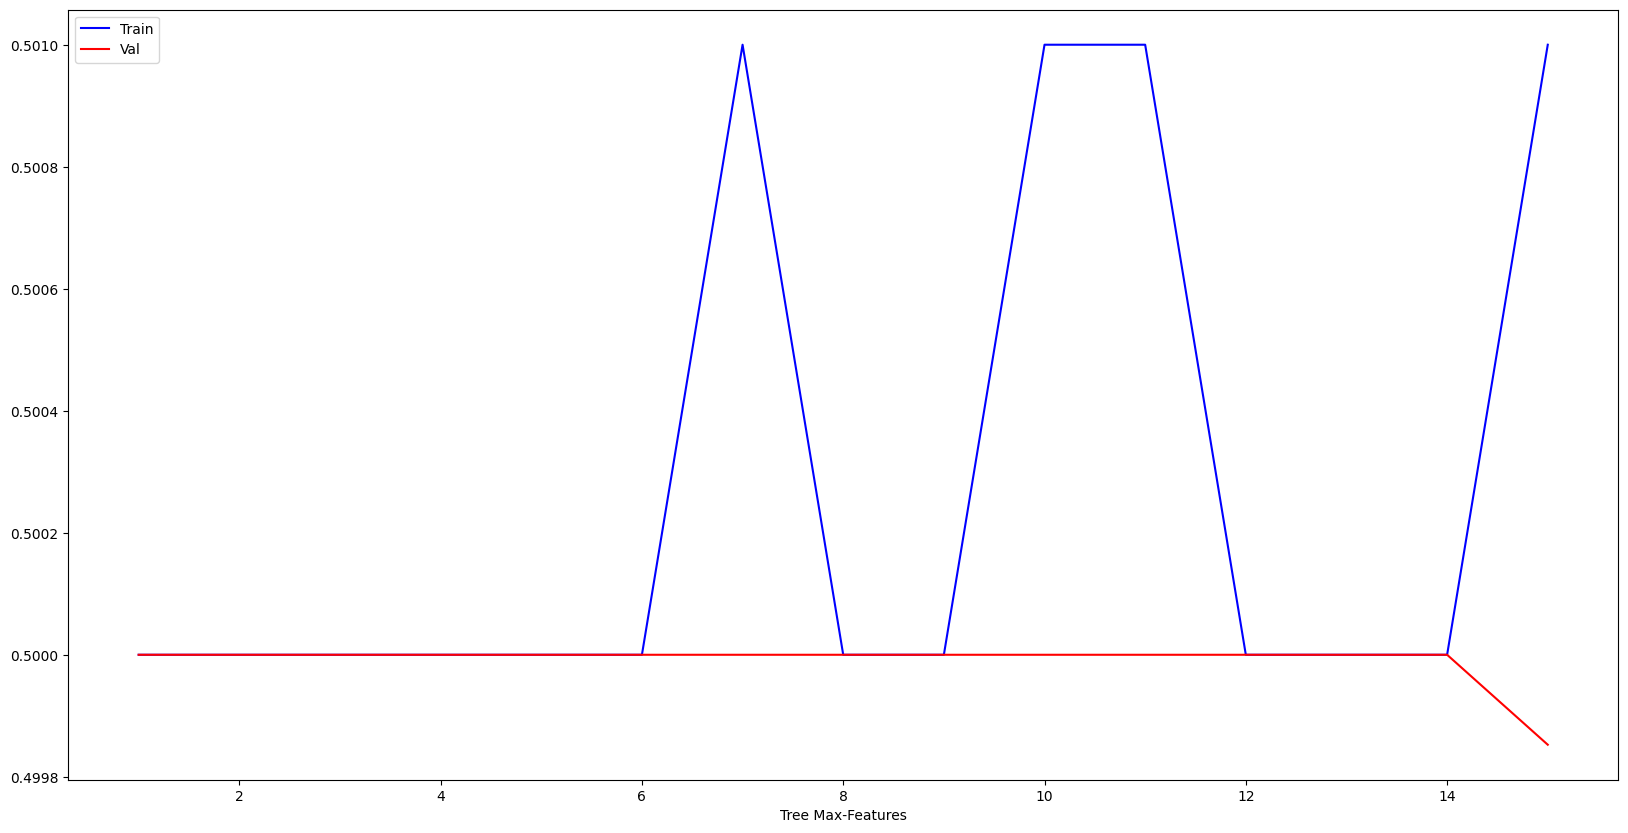

In [156]:
vals_results = []
train_results = []

X_train, dv = train_one_hot_encondig(df_train,numerical+categorical+binary[0:-1])
X_val = get_one_hot_encondig(df_val, numerical+categorical+binary[0:-1], dv)
    
for max_feature in max_features:
    
    model = train_pr_tree(X_train, y_train, max_depth, min_samples_split, min_samples_leaf, max_feature)
    
    train_pred = model.predict(X_train)
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    train_results.append(roc_auc_train)
    
    val_pred = model.predict(X_val)
    fpr_val, tpr_val, thresholds_val = roc_curve(y_val, val_pred)
    roc_auc_val = auc(fpr_val, tpr_val)
    vals_results.append(roc_auc_val)

    
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, vals_results, 'r', label='Val AUC')
plt.xlabel('Tree Max-Features')
plt.legend(['Train', 'Val'])
plt.show()

In [167]:
def train_tree(X_train, y_train, X_val):
    model = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=2)
    model.fit(X_train, y_train)
    
    return model.predict(X_val)

In [168]:
# least important feature
for col in numerical+categorical+binary[0:-1]:
    subset = numerical+categorical+binary[0:-1].copy()
    subset.remove(col)
    X_train, dv = train_one_hot_encondig(df_train,subset)
    X_val = get_one_hot_encondig(df_val, subset, dv)
    y_pred = train_tree(X_train, y_train, X_val)

    print('column removed: ',col)
    print('roc_score: ',round(roc_auc_score(y_val, y_pred),3))
    y_pred = pd.DataFrame(y_pred>0.5).astype(int)
    print('confusion_matrix: \n',confusion_matrix(y_val, y_pred))
    print('---------------------------------------------------')

column removed:  salary_range_min
roc_score:  0.793
confusion_matrix: 
 [[4481   56]
 [  93  138]]
---------------------------------------------------
column removed:  salary_range_max
roc_score:  0.805
confusion_matrix: 
 [[4480   57]
 [  87  144]]
---------------------------------------------------
column removed:  title
roc_score:  0.788
confusion_matrix: 
 [[4459   78]
 [  94  137]]
---------------------------------------------------
column removed:  location
roc_score:  0.807
confusion_matrix: 
 [[4474   63]
 [  86  145]]
---------------------------------------------------
column removed:  department
roc_score:  0.812
confusion_matrix: 
 [[4483   54]
 [  84  147]]
---------------------------------------------------
column removed:  employment_type
roc_score:  0.792
confusion_matrix: 
 [[4476   61]
 [  93  138]]
---------------------------------------------------
column removed:  required_experience
roc_score:  0.795
confusion_matrix: 
 [[4484   53]
 [  92  139]]
------------------

### Save Model

In [169]:
X_train, dv = train_one_hot_encondig(df_train,numerical+categorical+binary[0:-1])

In [170]:
model = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=2)
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [171]:
import pickle

In [173]:
with open('model.bin', 'wb') as f_out:
   pickle.dump((dv, model), f_out)
f_out.close()